# Lab 1 - Preprocessing

Name: Đinh Vũ Gia Hân 

Class: 22KHMT2

ID: 22127098 

# Self-evaluation

| No.   | Details                                       | Level of completion     |
|-------|-----------------------------------------------|-------------------------|
| 1     | Data cleaning                                 | 25%                     |
| 2     | Dimensionality Reduction                      | 25%                     |
| 3     | Data Normalization                            | 25%                     |
| 4     | Data Discretization                           | 25%                     |
|       | Total                                         | 100%                    |

# About Dataset

**Dataset information:**

The *Adult Census Incom* dataset was obtained from UCI Machine Learning Repository. The goal of this dataset is to predict if an individual's annual income exceeds $50,000 based on demographic characteristics.

**Attribute information:**
- `age`: The age of the individual.
- `workclass`: The type of employment (e.g., Private, Government, Self-employed, etc.).
- `fnlwgt`: The final weight of the survey.
- `education`: The level of education.
- `education-num`: The number of years of education, in integer form.
- `marital-status`: Marital status (single, married, divorced, etc.).
- `occupation`: Occupation (Managerial, Clerical, Service, etc.).
- `relationship`: Relationship to the household (spouse, child, other relative, etc.).
- `race`: Race.
- `sex`: Gender.
- `capital-gain`: Income from capital (not from wages).
- `capital-loss`: Loss from capital (from investments).
- `hours-per-week`: The number of hours worked per week.
- `native-country`: Country of origin.
- `income` (target variable): Representing the individual's income.


# Import neccessary library

This lab use the following libraries:
- **numpy**: for matrix operations and numerical processing
- **pandas**: for tabular data manipulation
- **mathplotlib**: for plotting data
- **seaborn**: for data visualization
- **warnings**: for ignoring warnings when plotting data 

In [1]:
# import libraries
import numpy as np                  
import pandas as pd                 
import matplotlib.pyplot as plt  
import seaborn as sns             
import warnings                  
warnings.filterwarnings('ignore') 

# Read dataset

First, we use pandas.read_csv() to read the data in tabular format from file adult.data and save it as `dataset`. Then, we make a copy named `df` of `dataset`, which will be preprocessed.

In [2]:
# define column names
column_names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship",
                "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

# load the dataset with these column names
dataset = pd.read_csv("adult.data", header = None, names = column_names)

# make a copy of the dataset
df = dataset.copy()

In [3]:
# print the first 5 rows of the dataset
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# print the last 5 rows of the dataset
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


# Santity check of data

In [5]:
# print the shape of the dataset
df.shape

(32561, 15)

In [6]:
# print the column types of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
# print the unique values of the columns
for column in df.columns:
    print(column, df[column].unique())

age [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
fnlwgt [ 77516  83311 215646 ...  34066  84661 257302]
education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
education-num [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-o

General information:
- The dataset has 32561 rows and 15 columns.
- There are 6 features of type int64 and 9 features of type object:
    - Type int64: age, fnlwgt, education-num, capital-gain, capital-loss and hours-per-week.
    - Type object: workclass, education, marital-status, occupation, relationship, race, sex, native-country and income.
- There are some features that have '?' data, which is worth noting during preprocessing.

# Exploratory data analysis (EDA)

In [8]:
# print the summary statistics of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


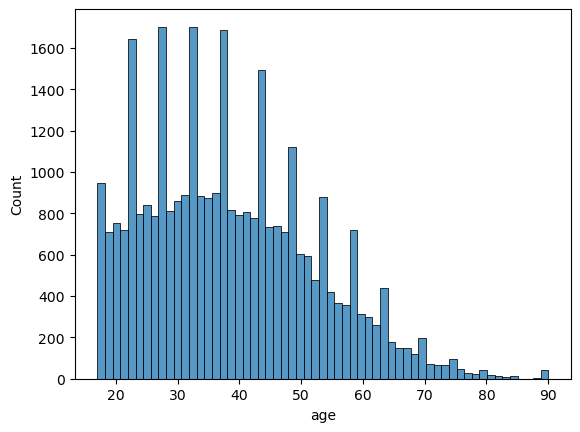

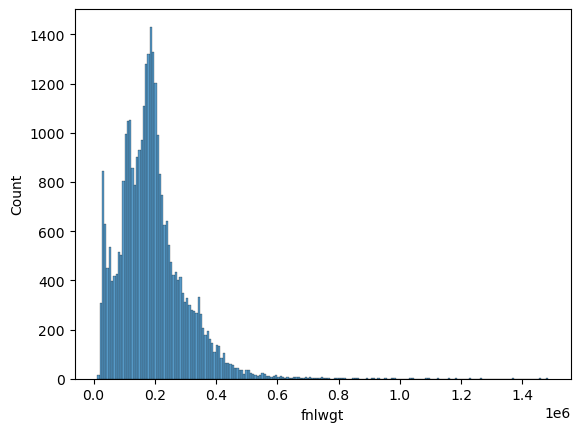

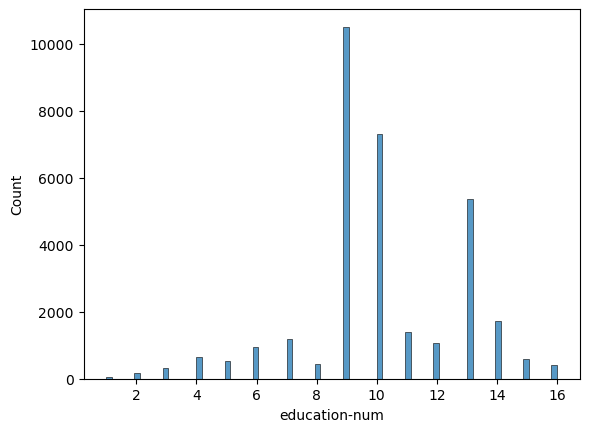

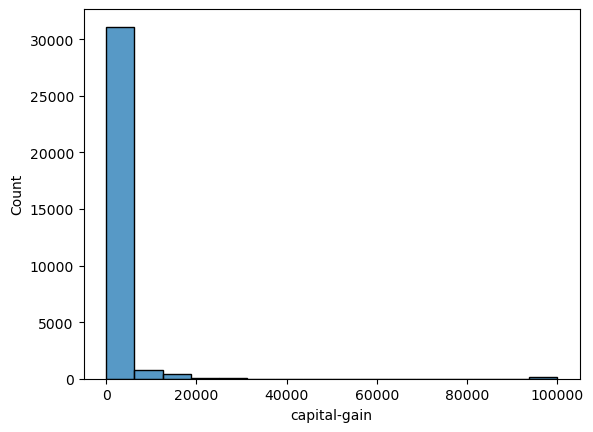

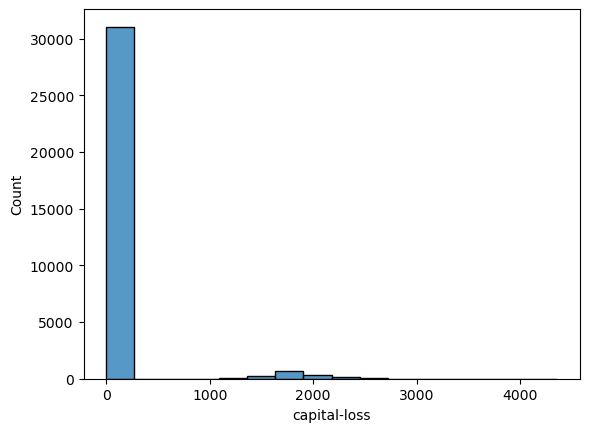

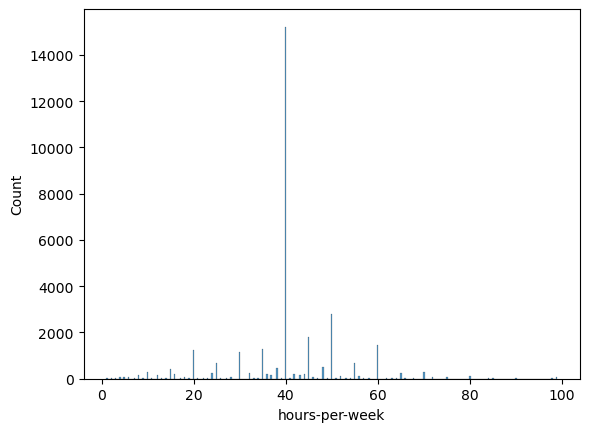

In [9]:
# histogram to understand the distribution 
for i in df.select_dtypes(include = 'number').columns:
    sns.histplot(data = df, x = i)
    plt.show()

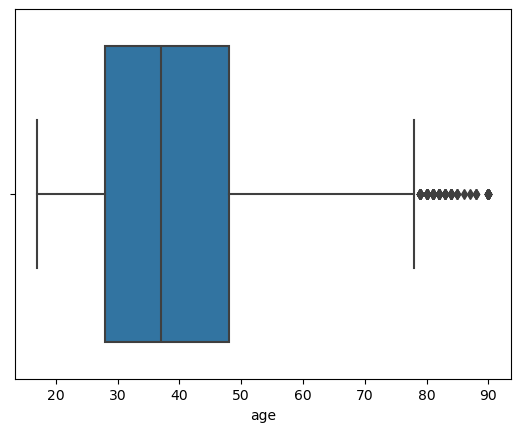

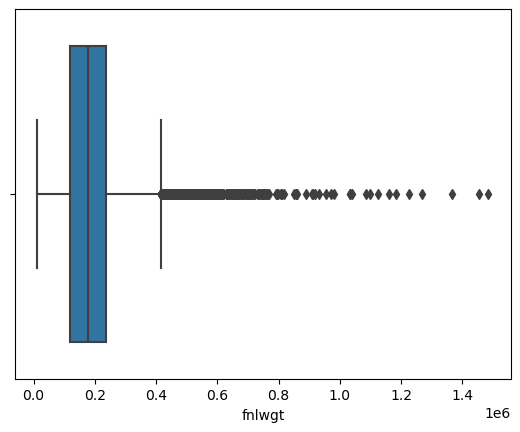

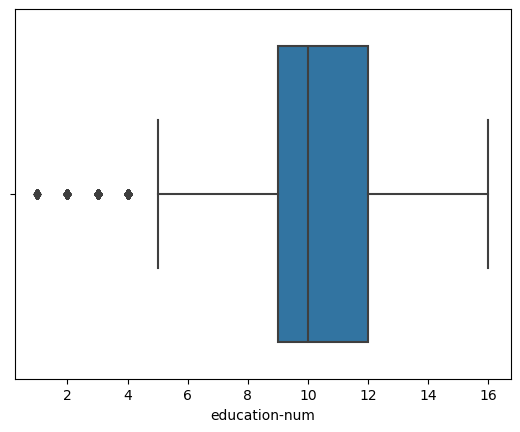

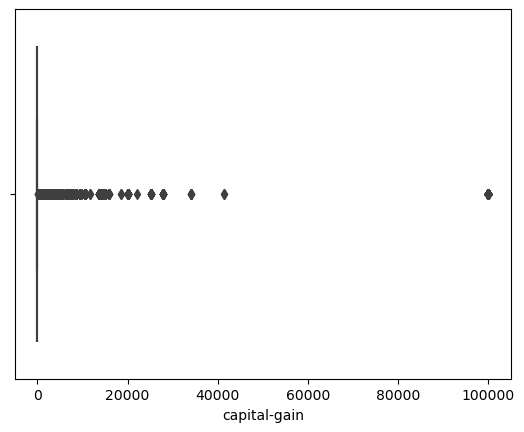

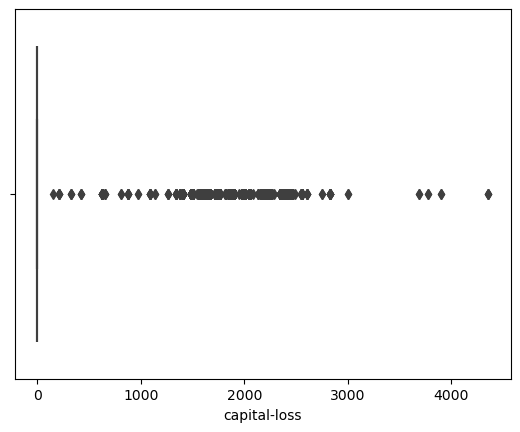

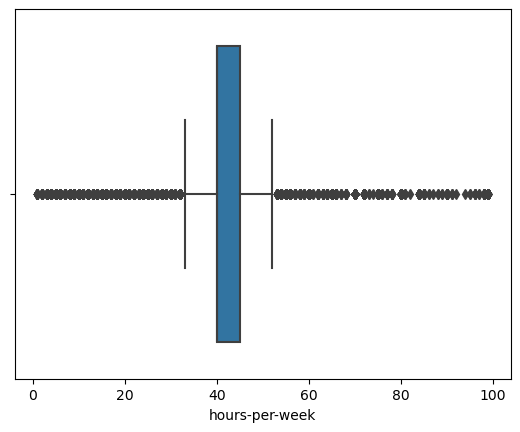

In [10]:
# boxplot to understand the distribution
for i in df.select_dtypes(include = 'number').columns:
    sns.boxplot(data = df, x = i)
    plt.show()

Breakdown of variables:
- age:
    - The average age is 38.6 years old.
    - The youngest person is 17, and the oldest is 90.
    - The distribution seems somewhat right-skewed, with more people in the lower age ranges.
- fnlwgt:
    - The mean is 189778.37, but the standard deviation is quite large (105549.98), indicating a wide range of values.
- education-num:
    - The average is 10.08 years.
    - The distribution is slightly right-skewed, with most people completing high school (12 years) or less.
- capital-gain:
    - The mean is 1077.65, but the maximum value is 99999, suggesting outliers or potential data issues.
- capital-loss:
    - The mean is 87.30, with the maximum loss being 4356.
- hours-per-week:
    - The average number of hours worked per week is 40.44.
    - The distribution is likely right-skewed, with most people working a standard 40-hour week.

In conclusion:
- The large standard deviations in some columns suggest potential outliers or a wide range of values.
- The "fnlwgt" column needs further investigation to understand its purpose and impact on the analysis.
- The "capital-gain" column with a maximum value of 99999 might require further cleaning or investigation to determine if it represents a valid data point.

# Data Cleaning

In the real world, the data is dirty with lots of potential incorrect data from human mistakes. computing errors, or transmission problems. So, in this part, we will preprocess to ensure the accuracy and reliability of later analyses.

## Assessment of Missing Data

First, we will check if there is any missing data present by using pandas.isnull() to indicate whether values are missing and pandas.sum() to count all of them.

In [11]:
# show missing values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

As we have seen, although the dataset does not have any missing values, they do contain '?' values. Because these values can hinder income prediction, we consider these values as missing values. Let's try to count how many of those values are in the dataset.

In [12]:
# show '?' values
(df == ' ?').sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

Missing data present in 3 features:
- workclass: 1836 missing values.
- occupation: 1843 missing values.
- native-country: 583 missing values.

To address this problem, we will fill in the missing values. Because of by doing it, we can avoids losing valuable information and ensure model have complete data.

The affected records should not be excluded from the dataset because they occupy a considerable amount of the dataset. Therefore, removing them can lead to lose vabluable information.

The missing values should be imputed because it can remain the records to analyse.

In this lab, pandas.fillna() will be used to fill the missing values. The method used to fill is `bfill`, which use next valid observation to fill gap. But first, we need to replace all the '?' with the NaN value.

In [13]:
# fill missing values
for i in ['workclass', 'occupation', 'native-country']:
    df[i].replace(to_replace = ' ?', value = np.nan, inplace = True)
    df[i] = df[i].fillna(method = 'bfill') 

## Identification of Duplicate Records

After filling in missing data, we will check for duplicate records by using pandas.duplicated().

In [14]:
# check missing values
df.duplicated().sum()

23

There are 23 duplicated row in this datasset, so we will keep only one of them and remove the remain ones.

In [15]:
# drop duplicate rows
df = df.drop_duplicates()

In [16]:
# print shape after dropping duplicates
df.shape

(32538, 15)

There are 32538 rows left after removing duplicated records.

## Additional Data Cleaning Methods

### Reformat the data

The dataset has not been consistenly formatted. We will remove extra whitespace before each value and standardize letter case

In [17]:
# format the data
df['workclass'] = df['workclass'].str.strip().str.lower()
df['education'] = df['education'].str.strip().str.lower()
df['marital-status'] = df['marital-status'].str.strip().str.lower()
df['occupation'] = df['occupation'].str.strip().str.lower()
df['relationship'] = df['relationship'].str.strip().str.lower()
df['race'] = df['race'].str.strip().str.lower()
df['sex'] = df['sex'].str.strip().str.lower()
df['native-country'] = df['native-country'].str.strip().str.lower()
df['income'] = df['income'].str.strip().str.lower()

### Remove oulier

Ouliers are data points that significantly deviate from the majority of the data. They can skew statistical analysis and negatively impact the learning model. 

To remove the oulier, we will use Whisker formula, which gives upper and lower bounds for the data. The formla is defined as: (from source [1]) 
$$\text{lower\_weight} = Q_1 - 1.5 \times IQR$$
$$\text{upper\_weight} = Q_3 + 1.5 \times IQR$$

Where: 
- The median ($Q_2$) divides the data set into two parts, the upper set and the lower set.  
    - $Q_1$ is the median of the lower half.
    - $Q_3$ is the median of the upper half.
- The interquartile range: $IQR = Q_3 - Q_1$. 

In [18]:
def whisker(feature):
    """
    This function calculates the lower and upper whiskers of a feature.

    Parameters:
    -----------
    feature: str
        the feature name

    Returns:
    ----------
    lw: float
        lower whisker
    uw: float
        upper whisker
    """
    q1, q3 = np.percentile(df[feature], [25, 75])
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr
    uw = q3 + 1.5 * iqr
    return lw, uw

In [19]:
for i in {'age', 'fnlwgt', 'education-num', 'hours-per-week'}:
    # get lower and upper whiskers
    lw, uw = whisker(i)

    # replace the outliers on the upper side
    df[i] = np.where(df[i] > uw, uw, df[i])
    df[i] = np.where(df[i] < lw, lw, df[i])

# Data Discretization

Now, we will define categorized boundaries for features to simplify data, reduce the complexity of the dataset, and help us focus on broader patterns, which can be especially helpful when there are too many granular categories or when certain categories have low representation.

## Categorical features

Although these are already discrete, we will classify them again to make it cleaner and easier to understand.

### Education

This feature has many values belonging to the same learning group, so we will reclassify them based on information from the following source [2].

In [20]:
# reclassify the education column
df.education = df.education.replace(['preschool', '1st-4th', '5th-6th'], 'elementary-school')
df.education = df.education.replace(['7th-8th', '9th', '10th', '11th', '12th'], 'some-high-school')
df.education = df.education.replace('hs-grad', 'completed-high-school')
df.education = df.education.replace(['assoc-voc'], 'trade-school')
df.education = df.education.replace(['assoc-acdm', 'some-college'], 'diploma')
df.education = df.education.replace(['bachelors'], 'bachelors')
df.education = df.education.replace(['masters'], 'masters')
df.education = df.education.replace(['doctorate', 'prof-school'], 'doctorate')

In [21]:
# print the new unique values of the education column
df['education'].value_counts()

education
completed-high-school    10495
diploma                   8349
bachelors                 5353
some-high-school          3700
masters                   1722
trade-school              1382
doctorate                  989
elementary-school          548
Name: count, dtype: int64

### Workclass

We will group similar classes based on the type of employment to reduce the number of unique values. Here's the new categorized:
- government: Combine `state-gov`, `federal-gov`, and `local-gov`.
- self-Employed: Combine `self-emp-not-inc` and `self-emp-inc`.
- pivate: Keep `private` as a standalone category.
- unemployed: Group `without-pay` and `never-worked`.

In [22]:
# reclassify the workclass column
df['workclass'] = df['workclass'].replace(['state-gov', 'federal-gov', 'local-gov'], 'government')
df['workclass'] = df['workclass'].replace(['self-emp-not-inc', 'self-emp-inc'], 'self-Employed')
df['workclass'] = df['workclass'].replace('private', 'private')
df['workclass'] = df['workclass'].replace(['without-pay', 'never-worked'], 'unemployed')

In [23]:
# print the new unique values of the workclass column
df['workclass'].value_counts()

workclass
private          24034
government        4599
self-Employed     3882
unemployed          23
Name: count, dtype: int64

### Occupation

This feature has many values belonging to the same occupation group, so we will reclassify them based on information from the following source [3].

In [24]:
# reclassify the occupation column
df['occupation'] = df['occupation'].replace(['exec-managerial', 'prof-specialty', 'tech-support'], 'skill_level_34')
df['occupation'] = df['occupation'].replace(['adm-clerical', 'other-service', 'sales', 'priv-house-serv', 'farming-fishing', 'craft-repair', 'machine-op-inspct'], 'skill_level_2')
df['occupation'] = df['occupation'].replace(['protective-serv', 'transport-moving', 'handlers-cleaners', 'armed-forces'], 'skill_level_1')

In [25]:
# print the new unique values of the occupation column
df['occupation'].value_counts()

occupation
skill_level_2     19034
skill_level_34     9675
skill_level_1      3829
Name: count, dtype: int64

### Native country

As we have seen in the EDA section, `united-states` takes up most of this feature, so we can divide them into two categoriess: united-states and the rest of the countries.

In [26]:
# reclassify the native-country column
df['native-country'] = np.where(df['native-country'] != 'united-states', 'others', df['native-country'])

In [27]:
# print the new unique values of the native-country column
df['native-country'].value_counts()

native-country
united-states    29678
others            2860
Name: count, dtype: int64

## Numerical features

### Age

We will discrete this feature by using equal-width bining.

In [28]:
# divide the age into 3 bins
bin_ranges = pd.qcut(df['age'], q = 3)

# print the bin ranges
for label, interval in enumerate(bin_ranges.cat.categories):
    print(f"Bin {label}: {interval}")

Bin 0: (16.999, 31.0]
Bin 1: (31.0, 44.0]
Bin 2: (44.0, 78.0]


In [29]:
# divide the age into 3 bins and label them
df['age'] = pd.qcut(df['age'], q = 3, labels = ['16 - 31', '32 - 44', '45 - 78'])

In [30]:
# print the new unique values of the age column
df['age'].value_counts()

age
16 - 31    11447
32 - 44    10735
45 - 78    10356
Name: count, dtype: int64

### Capital-gain & capital-loss

In [31]:
def k_means_cluster(feature, k):
    """
    This function performs k-means clustering on a feature.

    Parameters:
    ----------
    feature: str
        the feature name
    k: int
        the number of clusters

    Returns:
    ----------
    df: DataFrame
        the DataFrame with the feature values replaced by cluster labels
    """
    # copy the feature data
    feature_data = df[[feature]].copy()
    
    # initialize centroids by sampling unique values of the feature
    unique_values = feature_data[feature].unique()
    centroids = pd.DataFrame(np.random.choice(unique_values, k), columns = [feature])
    
    converged = False
    while not converged:
        clusters = {i: [] for i in range(k)}
        
        # assign each value to the nearest centroid
        for value in unique_values:
            distances = [np.linalg.norm(value - centroid) for centroid in centroids[feature]]
            clusters[np.argmin(distances)].append(value)
        
        # calculate new centroids
        new_centroids = []
        for cluster in clusters.values():
            new_centroids.append(np.mean(cluster))
        
        new_centroids = pd.DataFrame(new_centroids, columns = [feature])
        
        # check for convergence
        converged = new_centroids.equals(centroids)
        centroids = new_centroids
    
    # create a mapping from original values to cluster labels
    label_mapping = {}
    for label, cluster in clusters.items():
        for value in cluster:
            label_mapping[value] = label
    
    # apply the mapping to the feature in the original data
    df[feature] = df[feature].map(label_mapping)
    
    return df

In [32]:
# apply k-means clustering to the capital-gain column
df = k_means_cluster('capital-gain', 3)

In [33]:
# print the new unique values of the capital-gain column
df['capital-gain'].value_counts()

capital-gain
0    31831
2      548
1      159
Name: count, dtype: int64

In [34]:
# apply k-means clustering to the capital-loss column
df = k_means_cluster('capital-loss', 3)

In [35]:
# print the new unique values of the capital-loss column
df['capital-loss'].value_counts()

capital-loss
1    31064
0     1259
2      215
Name: count, dtype: int64

## Label Encoding

Encode the discretized features in the new classification order.

In [36]:
# encode the age column
age_mapping = {'16 - 31': 0, '32 - 44': 1, '45 - 78': 2}
df['age'] = df['age'].map(age_mapping)

In [37]:
# encode the workclass column
workclass_mapping = {'government': 0, 'self-Employed': 1, 'private': 2, 'unemployed': 3}
df['workclass'] = df['workclass'].map(workclass_mapping)

In [38]:
# encode the education column
education_mapping = {'elementary-school': 0, 'some-high-school': 1, 'completed-high-school': 2, 'trade-school': 3, 'diploma': 4, 'bachelors': 5, 'masters': 6, 'doctorate': 7}
df['education'] = df['education'].map(education_mapping)

In [39]:
# encode the occupation column
occupation_mapping = {'skill_level_34': 0, 'skill_level_2': 1, 'skill_level_1': 2}
df['occupation'] = df['occupation'].map(occupation_mapping)

In [40]:
# encode the native-country column
native_country_mapping = {'united-states': 0, 'others': 1}
df['native-country'] = df['native-country'].map(native_country_mapping)

In [41]:
# encode the sex column
sex_mapping = {'female': 0, 'male': 1}
df['sex'] = df['sex'].map(sex_mapping)

In [42]:
# encode the income column
income_mapping = {'<=50k': 0, '>50k': 1}
df['income'] = df['income'].map(income_mapping)

In [43]:
def frequency_encoding(feature):
    """
    This function performs frequency encoding on a feature.

    Parameters:
    ----------
    feature: str
        the feature name

    Returns:
    ----------
    df: DataFrame
        the DataFrame with the feature values replaced by frequency encoding
    """
    # get the frequency of each category and sort by frequency in ascending order
    frequency_map = df[feature].value_counts().sort_values().index

    # create a dictionary to assign incremental numbers starting from 0
    encoding_map = {value: i for i, value in enumerate(frequency_map)}

    # apply this encoding to the column
    df[feature] = df[feature].map(encoding_map)
    
    return df

In [44]:
# print the unique values of the marital-status column
df['marital-status'].value_counts()

marital-status
married-civ-spouse       14970
never-married            10668
divorced                  4441
separated                 1025
widowed                    993
married-spouse-absent      418
married-af-spouse           23
Name: count, dtype: int64

In [45]:
# print the unique values of the relationship column
df['relationship'].value_counts()

relationship
husband           13187
not-in-family      8293
own-child          5064
unmarried          3445
wife               1568
other-relative      981
Name: count, dtype: int64

In [46]:
# print the unique values of the race column
df['race'].value_counts()

race
white                 27795
black                  3123
asian-pac-islander     1038
amer-indian-eskimo      311
other                   271
Name: count, dtype: int64

In [47]:
# apply frequency encoding to the marital-status, relationship, race columns
df = frequency_encoding('marital-status')
df = frequency_encoding('relationship')
df = frequency_encoding('race')

# Data Normalization

In [48]:
# print the first 5 rows of the dataset after encoding
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,1,0,77516.0,5,13.0,5,1,4,4,1,0,1,40.0,0,0
1,2,1,83311.0,5,13.0,6,0,5,4,1,0,1,32.5,0,0
2,1,2,215646.0,2,9.0,4,2,4,4,1,0,1,40.0,0,0
3,2,2,234721.0,1,7.0,6,2,5,3,1,0,1,40.0,0,0
4,0,2,338409.0,5,13.0,6,0,1,3,0,0,1,40.0,1,0


`fnlwgt` has a wide range and can significantly influence the model if not scaled.

In this part, we will use Min-Max scaling to scale the above features into range [0; 1]. The formula is defined as:
$$X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}} \times (X_{max\_new} - X_{min\_new}) + X_{min\_new}$$

In [49]:
def max_min_scaler(feature, x_min_new = 0, x_max_new = 1):
    """"
    This function scales the data using the formula:
    x_scaled = (x - x_min) / (x_max - x_min) * (x_max_new - x_min_new) + x_min_new

    Parameters:
    ----------
    feature: pandas.Series
        The data to be scaled

    Returns:
    ----------  
    new_data: pandas.Series
        The scaled data
    """
    x_max = df[feature].max()
    x_min = df[feature].min()
    df[feature] = (df[feature] - x_min) / (x_max - x_min) * (x_max_new - x_min_new) + x_min_new
    return df

In [50]:
# scale the fnlwgt column to the range [0, 1]
df = max_min_scaler('fnlwgt')

In [51]:
# scale the hours-per-work column to the range [0, 1]
df = max_min_scaler('hours-per-week')

# Dimensionality Reduction

To address dimensionality reduction, let's calculate the correlation matrix and display them to have an overall view about the relation between each feature.

In [52]:
# calculate the correlation matrix
corr = df.corr()
corr

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,-0.154679,-0.071894,0.049699,0.053751,-0.005728,-0.104713,0.227105,0.040487,0.089543,0.089001,-0.017860,0.123597,-0.020716,0.267808
workclass,-0.154679,1.000000,0.032058,-0.173428,-0.168952,-0.028970,0.118827,-0.052205,0.012130,-0.016926,-0.015219,0.012720,-0.044174,0.048667,-0.094714
fnlwgt,-0.071894,0.032058,1.000000,-0.036262,-0.039788,-0.002164,0.032779,-0.017313,0.002658,0.028830,-0.000148,-0.000993,-0.025750,0.081830,-0.008412
education,0.049699,-0.173428,-0.036262,1.000000,0.931442,0.100703,-0.436878,0.108422,0.032891,0.009796,0.146320,-0.040785,0.167506,-0.071874,0.331130
education-num,0.053751,-0.168952,-0.039788,0.931442,1.000000,0.106195,-0.435099,0.114042,0.037412,0.015263,0.146186,-0.043348,0.184981,-0.095413,0.342365
marital-status,-0.005728,-0.028970,-0.002164,0.100703,0.106195,1.000000,-0.027935,0.411060,0.068935,0.408290,0.049709,-0.070700,0.168228,-0.027793,0.311285
occupation,-0.104713,0.118827,0.032779,-0.436878,-0.435099,-0.027935,1.000000,-0.030457,-0.031391,0.097502,-0.105419,0.028197,-0.102178,0.016641,-0.245062
relationship,0.227105,-0.052205,-0.017313,0.108422,0.114042,0.411060,-0.030457,1.000000,0.113941,0.553437,0.050914,-0.055567,0.256986,-0.067054,0.254312
race,0.040487,0.012130,0.002658,0.032891,0.037412,0.068935,-0.031391,0.113941,1.000000,0.068014,0.013133,-0.009202,0.059247,-0.255463,0.067746
sex,0.089543,-0.016926,0.028830,0.009796,0.015263,0.408290,0.097502,0.553437,0.068014,1.000000,0.044469,-0.041696,0.256384,0.001834,0.215954


<Axes: >

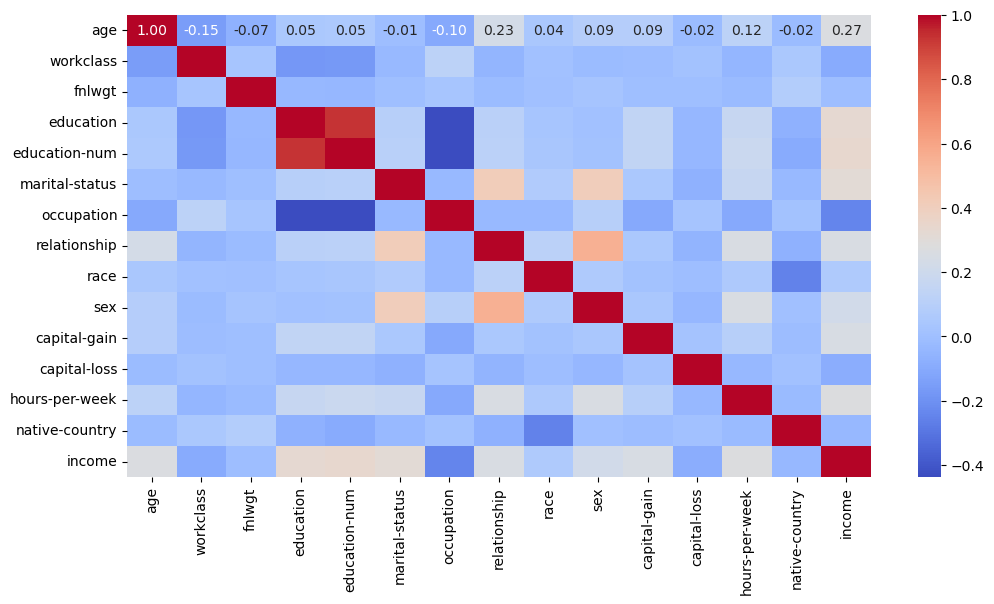

In [53]:
# plot the correlation matrix
plt.figure(figsize = (12, 6))
sns.heatmap(corr, annot = True, fmt = '.2f', cmap = 'coolwarm')

The most informative features are `age`, `education`, `education-num`, `marital-status`, `relationship`, `sex`, `hours-per-week`. Because their correlation with `income` are significant higher than the other features's one in the dataset (with correlation of 0.267808, 0.331130, 0.342365, 0.311285, 0.254312, 0.215954, 0.271060 respectively)

However, there is a high correlation between the following pairs of features:
- `education` and `education-num` with correlation 0.931442
- `relationship` and `sex` with correlation 0.553437
- `marital-status` and `relationship` with correlation 0.411060

So we will apply **High Correlation Filter** to address feature redundancy (referenced from [4]):
1. Calculate correlation: compute the correlation matrix for the features.
2. Set threshold: define a threshold to indentify highly correlated features.
3. Identify correlated pairs: identify feature pairs with a correlation coefficient exceeding the threshold.
4. Select features: from each correlated pair, retain the feature with higher predictive power and remove the other.

In [54]:
# copy the correlation matrix
corr_matrix = corr

# set the threshold
threshold = 0.4

# identify pairs of features with correlation greater than threshold
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

# print the features to drop
print("Features to drop based on correlation thresholding:", to_drop)

Features to drop based on correlation thresholding: ['education-num', 'relationship', 'sex']


In [55]:
# remove the features with correlation greater than threshold
df.drop(['education-num', 'relationship', 'sex'], axis = 1, inplace = True)

Then we use **PCA** to analysis the principal component (referenced from [4]):
1. Standardization: normalize the data so each feature contributes equally.
2. Calculate covariance matrix: compute the matrix to know how the variables of the dataset deviate from the mean and to see if they are correlated.
3. Find eigenvectors and eigenvalues: find the eigenvectors that maximize variance.
4. Sort and ranking: sort eigenvectors by their ability to capture data variance, using eigenvalues as the metric of importance.
5. Feature vector formation: select a subset of eigenvectors based on their rank to form a feature vector.
6. Transformatiom: map the original data into selected principal components. This reduces the dimensionality of the data while preserving most of the information.

In [56]:
data = df.values
variance_threshold = 0.9

# standardize the Data
data_centered = (data - np.mean(data, axis = 0)) / np.std(data, axis = 0)
    
# compute the Covariance Matrix
covariance_matrix = np.cov(data_centered, rowvar = False)
    
# calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    
# sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
    
# calculate explained variance ratio
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
    
# calculate cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)
   
# find the number of components that meets the variance threshold
num_components = np.argmax(cumulative_variance >= variance_threshold) + 1

# select the top components
selected_eigenvectors = sorted_eigenvectors[:, :num_components]

# project data onto the selected eigenvectors
reduced_data = np.dot(data_centered, selected_eigenvectors)

# identify features with the least influence (lowest absolute values in eigenvectors)
least_influential_features = np.argmin(np.abs(selected_eigenvectors), axis=0)
print("Features with least influence for each component:")
for i, feature_index in enumerate(least_influential_features):
    print(f"Component {i + 1}: {df.columns[feature_index]}")

# print the results
print(f"Cumulative explained variance for each component: {cumulative_variance}")
print(f"Number of components needed to retain {variance_threshold * 100}% variance: {num_components}")


Features with least influence for each component:
Component 1: fnlwgt
Component 2: age
Component 3: race
Component 4: marital-status
Component 5: native-country
Component 6: native-country
Component 7: fnlwgt
Component 8: education
Component 9: education
Component 10: marital-status
Cumulative explained variance for each component: [0.18047089 0.28468941 0.38246635 0.47158745 0.55748911 0.63813264
 0.71536394 0.78706969 0.85333462 0.9128647  0.95935522 1.        ]
Number of components needed to retain 90.0% variance: 10


In conclusion:
- To retain 90% of information, we need at least 10 feautres. 
- Now we have 11 features left, so we will one more feature. That is `fnlwgt` because it is the least influence component.

In [57]:
# remove the least influential features
df.drop('fnlwgt', axis = 1, inplace = True)

Preprocessing is done and here is the final data:

In [58]:
# printe the first 5 rows of the dataset after preprocessing
df

,age,workclass,education,marital-status,occupation,race,capital-gain,capital-loss,hours-per-week,native-country,income
0,1,0,5,5,1,4,0,1,0.375,0,0
1,2,1,5,6,0,4,0,1,0.000,0,0
2,1,2,2,4,2,4,0,1,0.375,0,0
3,2,2,1,6,2,3,0,1,0.375,0,0
4,0,2,5,6,0,3,0,1,0.375,1,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,0,2,4,6,0,4,0,1,0.275,0,0
32557,1,2,2,6,1,4,0,1,0.375,0,1
32558,2,2,2,2,1,4,0,1,0.375,0,0
32559,0,2,2,5,1,4,0,1,0.000,0,0


# References

[1]: "Box-and-Whisker Plots". *Varsity Tutors*, https://www.varsitytutors.com/hotmath/hotmath_help/topics/box-and-whisker-plots. Accessed date: 08/11/2024

[2]: "International standard classification of education". https://www.researchgate.net/figure/The-classification-of-parental-education-derived-from-the-highest-level-of-education_tbl4_6687684. Accessed date: 08/11/2024

[3]: "International Standard Classification of Occupations". *ILOSTAT*, https://ilostat.ilo.org/methods/concepts-and-definitions/classification-occupation/. Accessed date: 08/11/2024

[4]: "Top 12 Dimensionality Reduction Techniques for Machine Learning". *ENCORD*, 2024. https://encord.com/blog/dimentionality-reduction-techniques-machine-learning/. Accessed date: 08/11/2024